# Sales Performance Analysis with Walmart Data
### Focus:
### Exploring the dataset using pandas functions
### Practicing groupby(), merge(), join(), and concat()
### Objective:
### Analyze sales performance across different stores and departments. Use groupby to find trends and combine data using merging and concatenation techniques.
### Skills Practiced:
### Aggregation with groupby() (e.g. total sales by store or department)
### Merging different datasets (e.g. sales with features)
### Concatenating data (e.g. appending data from different weeks)
### Basic EDA (describe(), value_counts(), filtering)

In [30]:
import pandas as pd
import numpy as np


## features csv (store-level features)

In [67]:
path_features = r"C:\Users\bbuser\Documents\ANACONDA\DataScience-Brain-Bytes\Team_members\from_sarah_ali\data\features.csv"
features = pd.read_csv(path_features)
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


## #train  (sales data)


In [68]:
path_train = "DATA walmart-recruiting-store-sales-forecasting/walmart sales used data/train.csv"
train = pd.read_csv(path_train)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


## stores.csv (store type and size)

In [69]:
path_stores = "DATA walmart-recruiting-store-sales-forecasting/walmart sales used data/stores.csv"
stores = pd.read_csv(path_stores)
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


#### to see the columns

In [43]:
df_features = pd.read_csv(path_features)  

df_features.columns 

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [44]:
# Load the data from the file path into a DataFrame
df_train = pd.read_csv(path_stores)  # or pd.read_excel, pd.read_json, etc. depending on file type

#  access the columns
df_train.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [76]:
print("Stores columns:", stores.columns)


print("Features columns:", features.columns)


print ("Train columns:",  train.columns)



Stores columns: Index(['Store', 'Type', 'Size'], dtype='object')
Features columns: Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Train columns: Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


### Aggregation with groupby()

In [51]:
total = df_store.groupby('Store')['Weekly_Sales'].agg(['sum'])
total

,sum
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [78]:
#stote - weekly sale sum and mean
total = df_store.groupby('Store')['Weekly_Sales'].agg(['sum','mean'])
total

,sum,mean
Store,,
1,2.224028e+08,21710.543621
2,2.753824e+08,26898.070031
3,5.758674e+07,6373.033983
4,2.995440e+08,29161.210415
5,4.547569e+07,5053.415813
6,2.237561e+08,21913.243624
7,8.159828e+07,8358.766148
8,1.299512e+08,13133.014768
9,7.778922e+07,8772.890379


In [120]:
# Holiday vs Non-Holiday Performance
# Goal: Compare sales during holidays vs regular weeks.
holiday_stats = train.groupby('IsHoliday')['Weekly_Sales'].agg(
    Total_Sales='sum',
    Avg_Sales='mean',
    Transaction_Count='count'
).reset_index()

holiday_stats

,IsHoliday,Total_Sales,Avg_Sales,Transaction_Count
0,False,6.231919e+09,15901.445069,391909
1,True,5.052996e+08,17035.823187,29661


In [135]:
# Merge store type info with sales data   merge and group by
merged = pd.merge(train, stores, on='Store')

dept_performance = merged.groupby(['Type', 'Dept'])['Weekly_Sales'].agg(Total_Sales='sum',Avg_Sales='mean'
                                                                       ).sort_values('Total_Sales', ascending=False).reset_index()

#dept_performance 
print(dept_performance.head(9))

  Type  Dept   Total_Sales      Avg_Sales
0    A    92  3.528455e+08  112156.881662
1    A    95  3.054578e+08   97094.026043
2    A    90  2.219519e+08   70550.502168
3    A    38  2.045058e+08   65005.018090
4    A    72  1.785082e+08   62046.661710
5    A    91  1.690476e+08   53734.139097
6    A    40  1.687679e+08   53645.225607
7    A     2  1.635752e+08   51994.674873
8    A    94  1.606569e+08   51067.047111


## 1Merging different datasets 

In [85]:
# Merge sales data with features using 'Store', 'Date', and 'IsHoliday' as keys
merged_sales_features = pd.merge(
    train, 
    features, 
    on=['Store', 'Date', 'IsHoliday'], 
    how='left'
)
merged_sales_features

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [86]:
# Step 1: Aggregate sales by store
sales_by_store = train.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Step 2: Merge aggregated sales with store details
merged_aggregated = pd.merge(sales_by_store, stores, on='Store', how='left')
merged_aggregated.head()

,Store,Weekly_Sales,Type,Size
0,1,2.224028e+08,A,151315
1,2,2.753824e+08,A,202307
2,3,5.758674e+07,B,37392
3,4,2.995440e+08,A,205863
4,5,4.547569e+07,B,34875


In [88]:
# Merge store details with features on 'Store' column

merged_store_features = pd.merge(stores, features, on='Store', how='inner')
merged_store_features.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### 2. Concatenating Data


In [89]:
#Vertical Concatenation (Combine DataFrames)

# Split train data into two parts and concatenate
train_part1 = train.iloc[:200000]
train_part2 = train.iloc[200000:]
combined_train = pd.concat([train_part1, train_part2], axis=0)
print(f"Original shape: {train.shape}, Combined shape: {combined_train.shape}")

Original shape: (421570, 5), Combined shape: (421570, 5)


In [91]:
#Example 2: Concatenate with Different Columns

# Create two DataFrames with partial columns
df1 = train[['Store', 'Date', 'Weekly_Sales']]
df2 = train[['Store', 'Dept', 'IsHoliday']]

# Concatenate horizontally (side-by-side)
combined_horizontal = pd.concat([df1, df2], axis=1)
combined_horizontal.head()

,Store,Date,Weekly_Sales,Store,Dept,IsHoliday
0,1,2010-02-05,24924.50,1,1,False
1,1,2010-02-12,46039.49,1,1,True
2,1,2010-02-19,41595.55,1,1,False
3,1,2010-02-26,19403.54,1,1,False
4,1,2010-03-05,21827.90,1,1,False


### 3. Basic EDA (Exploratory Data Analysis)

In [96]:
#describe categorical

train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [97]:
# describe numerical
print(stores['Type'].value_counts())


Type
A    22
B    17
C     6
Name: count, dtype: int64


In [101]:
# Filter stores with sales > $50,000
high_sales = train[train['Weekly_Sales'] > 50000]
print(f"High sales records: {len(high_sales)}")



High sales records: {len(high_sales)}


In [100]:
# Filter holiday sales
holiday_sales = train[train['IsHoliday'] == True]
print(f"Holiday sales avg: {holiday_sales['Weekly_Sales'].mean():.2f}")

Holiday sales avg: 17035.82


In [112]:
# 3. Correlation Analysis
# Numeric columns only
numeric_data = features.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.020566,0.066682,-0.136967,-0.044223,-0.033279,-0.005174,-0.011970,-0.209282,0.221153
Temperature,-0.020566,1.000000,0.101354,-0.124979,-0.321888,-0.077552,-0.064194,-0.003241,0.164426,0.150890
Fuel_Price,0.066682,0.101354,1.000000,0.066122,-0.193461,-0.057168,-0.008546,-0.021926,-0.186696,-0.033360
MarkDown1,-0.136967,-0.124979,0.066122,1.000000,0.021289,-0.089841,0.810455,0.085967,-0.044327,0.020501
MarkDown2,-0.044223,-0.321888,-0.193461,0.021289,1.000000,-0.053555,-0.046595,-0.008166,-0.044896,-0.001692
MarkDown3,-0.033279,-0.077552,-0.057168,-0.089841,-0.053555,1.000000,-0.062785,-0.016026,-0.020166,-0.003464
MarkDown4,-0.005174,-0.064194,-0.008546,0.810455,-0.046595,-0.062785,1.000000,0.042952,-0.053868,0.021905
MarkDown5,-0.011970,-0.003241,-0.021926,0.085967,-0.008166,-0.016026,0.042952,1.000000,0.001526,0.031847
CPI,-0.209282,0.164426,-0.186696,-0.044327,-0.044896,-0.020166,-0.053868,0.001526,1.000000,-0.303110
Unemployment,0.221153,0.150890,-0.033360,0.020501,-0.001692,-0.003464,0.021905,0.031847,-0.303110,1.000000


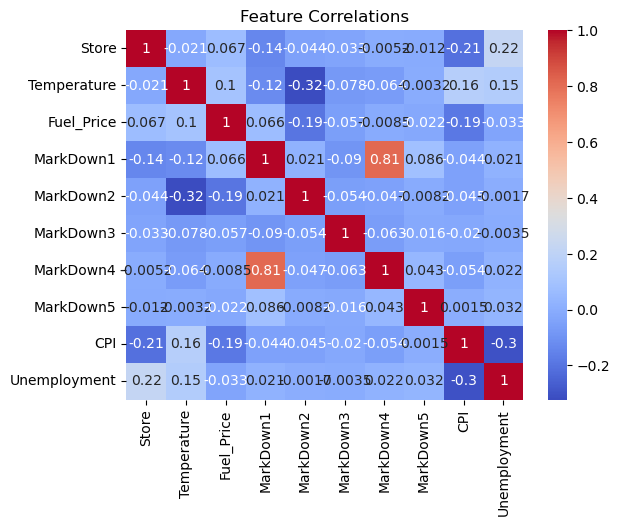

In [111]:
# Plot correlations (requires matplotlib/seaborn)
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

Correlation between Store Size and Total Sales: 0.85


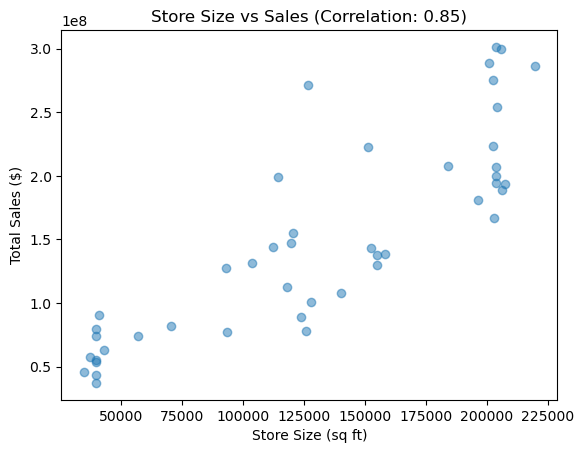

In [109]:
# Merge stores with sales data
store_sales = pd.merge(
    train.groupby('Store')['Weekly_Sales'].sum().reset_index(),
    stores,
    on='Store'
)

# Calculate correlation
size_corr = store_sales[['Weekly_Sales', 'Size']].corr().iloc[0,1]
print(f"Correlation between Store Size and Total Sales: {size_corr:.2f}")

# Scatter plot
plt.scatter(store_sales['Size'], store_sales['Weekly_Sales'], alpha=0.5)
plt.xlabel("Store Size (sq ft)")
plt.ylabel("Total Sales ($)")
plt.title(f"Store Size vs Sales (Correlation: {size_corr:.2f})")
plt.show()